In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pgmpy

     |████████████████████████████████| 337kB 16.8MB/s 


In [3]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
model=BayesianModel([("sheep_x","c2_dist"),("sheep_y","c2_dist"),("c2_x","c2_dist"),("c2_y","c2_dist"),
                     ("sheep_x","c1_dist"),("sheep_y","c1_dist"),("c1_x","c1_dist"),("c1_y","c1_dist"),
                     ("sheep_x","corner_dist"),("sheep_y","corner_dist"),
                     ("c1_x","sheep_move_x"),("c2_x","sheep_move_x"),
                     ("c1_y","sheep_move_y"),("c2_y","sheep_move_y"),
                      ("corner_dist","sheep_step_size"),("sheep_y","sheep_step_size"),("sheep_x","sheep_step_size"),
                      ("c1_dist","sheep_step_size"),("c2_dist","sheep_step_size"),
                      ("sheep_move_x","final_choice"),("sheep_move_y","final_choice"),("sheep_step_size","final_choice"),
                      ("final_choice","c1_choice"),("sheep_x","c1_choice") ,("sheep_y","c1_choice"),
                      ("c1_y","c1_choice") ,
                    ("c1_x","c1_choice") ,("c2_x","c1_choice") ,("c2_y","c1_choice")])

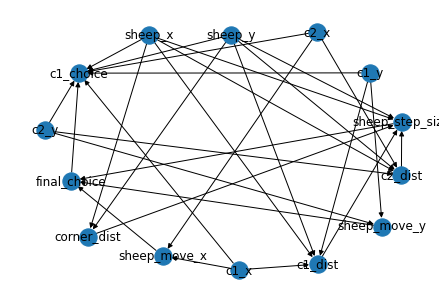

In [5]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()

In [6]:
cols=['sheep_x','sheep_y','c1_x','c1_y','c2_x','c2_y',"c1_dist","c2_dist","corner_dist","sheep_move_x",
      "sheep_move_y","sheep_step_size","final_choice","c1_choice"]

In [7]:
import random
import math
SIZE=4
sheep=[]#sheep,c1 and c2 are the list of [x,y] coordinates position
c1=[]
c2=[]
dict={}
def manhattan(src,des): #manhattan shortest distances (source x, source y, destination x, destination y)
        return (abs(src[0]-des[0])+abs(src[1]-des[1]))

def generate_rand_pos(n,board):
        global sheep,c1,c2
        for i in range(1000):
            sheep=[random.randint(0,n-1),random.randint(0,n-1)] #random sheep pos  
            c1=[random.randint(0,n-1),random.randint(0,n-1)] #random cavemen 1 pos
            c2=[random.randint(0,n-1),random.randint(0,n-1)] #random cavemen 2 pos

            #setting position of sheep,c1,and c2 as 3,1,2 respectively in the board, are all other position as zero
            if sheep==c1 or sheep==c2 or c1==c2:
                continue
    
            board[sheep[0]][sheep[1]]=3
            board[c1[0]][c1[1]]=1
            board[c2[0]][c2[1]]=2
            break

def within_radius(): #within radius of 2
        global sheep,c1,c2
        if (manhattan(sheep,c2))<=2:
            return 1
        if (manhattan(sheep,c1))<=2:
            return 1
        return 0
    
def find_corner_dist(n,board):
        global sheep
        corner=[]
        for i in range(2):
            for j in range(2):
                corner.append([i*(n-1),j*(n-1)]) #corner points
        temp=min([manhattan(sheep,corner[j]) for j in range(len(corner))]) #distance to nearest corner
        return temp

def final_choice(c,n,board):
        global sheep,c1,c2
        corner=[]
        for i in range(2):
            for j in range(2):
                corner.append([i*(n-1),j*(n-1)]) #corner points
                
        move=[0]*8; #step 1,2 in north east, north west, south west, south east (8 locations will be carrying sum)
        if within_radius()==1:
            for i in range(1,3):   #north east step 1
                if sheep[1]+i<n and sheep[0]-i>=0:
                    new_pos=[sheep[0]-i,sheep[1]+i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[i-1]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            for i in range(1,3):   #North west
                if sheep[1]-i>=0 and sheep[0]-i>=0:
                    new_pos=[sheep[0]-i,sheep[1]-i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[1+i]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            for i in range(1,3):   #south west
                if sheep[1]-i>=0 and sheep[0]+i<n:
                    new_pos=[sheep[0]+i,sheep[1]-i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[3+i]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            for i in range(1,3):   #south east
                if sheep[1]+i<n and sheep[0]+i<n:
                    new_pos=[sheep[0]+i,sheep[1]+i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[5+i]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            #print(move)
            next_move=move.index(max(move))
            return next_move
        return -1

def move_sheep(n,board):
        global sheep,c1,c2
        corner=[]
        for i in range(2):
            for j in range(2):
                corner.append([i*(n-1),j*(n-1)]) #corner points
                
        move=[0]*8; #step 1,2 in north east, north west, south west, south east (8 locations will be carrying sum)
        if within_radius()==1:
            for i in range(1,3):   #north east step 1
                if sheep[1]+i<n and sheep[0]-i>=0:
                    new_pos=[sheep[0]-i,sheep[1]+i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[i-1]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            for i in range(1,3):   #North west
                if sheep[1]-i>=0 and sheep[0]-i>=0:
                    new_pos=[sheep[0]-i,sheep[1]-i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[1+i]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            for i in range(1,3):   #south west
                if sheep[1]-i>=0 and sheep[0]+i<n:
                    new_pos=[sheep[0]+i,sheep[1]-i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[3+i]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            for i in range(1,3):   #south east
                if sheep[1]+i<n and sheep[0]+i<n:
                    new_pos=[sheep[0]+i,sheep[1]+i]
                    temp=min([manhattan(new_pos,corner[j]) for j in range(len(corner))]) #distance to nearest corner
                    move[5+i]=manhattan(new_pos,c1)+manhattan(new_pos,c2)+temp
            
            #print(move)
            next_move=move.index(max(move))
            
            step=next_move%2+1
            #board[sheep[0]][sheep[1]]=0
            nsheep=[] #new sheep location
            if next_move<2:
                nsheep=[sheep[0]-step,sheep[1]+step] #north east step 1
                #board[sheep[0]][sheep[1]]=3
            elif next_move<4:
                nsheep=[sheep[0]-step,sheep[1]-step] #North west
            elif next_move<6:
                nsheep=[sheep[0]+step,sheep[1]-step] #south west
            else:
                nsheep=[sheep[0]+step,sheep[1]+step] #south east
            #board[sheep[0]][sheep[1]]=3
            return nsheep;
        else:
            return sheep
            
def move_cavemen(c,n,board):
    if random.random()<=.2:
        return c
    move=[99999999]*4 #up down left right
    if c[0]-1>=0: #up
        move[0]=manhattan([c[0]-1,c[1]],sheep)
    if c[0]+1<n: #down
        move[1]=manhattan([c[0]+1,c[1]],sheep)
    if c[1]-1>=0: #left
        move[2]=manhattan([c[0],c[1]-1],sheep)
    if c[1]+1<n: #right
        move[3]=manhattan([c[0],c[1]+1],sheep)
    
    #print(move)
    next_pos=c
    next_move=move.index(min(move))
    if next_move==0:
        next_pos=[c[0]-1,c[1]]
    elif next_move==1:
        next_pos=[c[0]+1,c[1]]
    elif next_move==2:
        next_pos=[c[0],c[1]-1]
    else:
        next_pos=[c[0],c[1]+1]
    return next_pos
        
#MAKE BOARD
def generate_board(n):
    board=[]*n
    for i in range(n):
        board.append([0]*n)
    generate_rand_pos(n,board)
    return board

    
#generate_rand_pos(SIZE,board)

def sheep_besides(c,sheep,n,board):
    x=abs(sheep[0]-c[0])+abs(sheep[1]-c[1])
    #print("math",x)
    if x<=1:
        return 1
    return 0

def sheep_captured(n,board,c1,c2,sheep):
    #print("::",sheep,c1,c2)
    if (sheep[0]==c1[0] and sheep[1]==c1[1]): #preference to c1
        return (1,1) 
    if (sheep[0]==c2[0] and sheep[1]==c2[1]): 
        return (1,2)
    if sheep_besides(c1,sheep,n,board)==1:
        return (1,1)
    if sheep_besides(c2,sheep,n,board)==1:
        return (1,2)
    return (0,0)

def print_board(msg,board):
    global sheep,c1,c2 
    print(msg)
    for i in board:
        print(i)
    #print(sheep,c1,c2)
    
    
def move_all(n,board):
    global sheep,c1,c2
    new_sheep=move_sheep(n,board)
    new_c1=move_cavemen(c1,n,board)
    new_c2=move_cavemen(c2,n,board)
    x=sheep_captured(n,board,new_c1,new_c2,new_sheep)
    
    board[sheep[0]][sheep[1]]=0
    sheep=new_sheep
    board[sheep[0]][sheep[1]]=3
    
    
    board[c1[0]][c1[1]]=0
    c1=new_c1
    board[c1[0]][c1[1]]=1
    
    if (c1[0]!=new_c2[0] or c1[1]!=new_c2[1]):
        if board[c2[0]][c2[1]]==2:
            board[c2[0]][c2[1]]=0
        c2=new_c2
        board[c2[0]][c2[1]]=2
    return x


SIZE=6
for j in range(1):
    board=generate_board(SIZE)
    #print_board("Game #"+str(j+1)+" starting board",board)
    flag=0
    df=pd.DataFrame(columns=cols)
    for i in range(1000):
        #print("ok:",sheep)
        dict['sheep_x']=sheep[0]
        dict['sheep_y']=sheep[1]
        dict['c1_x']=c1[0]
        dict['c1_y']=c1[1]
        dict['c2_x']=c2[0]
        dict['c2_y']=c2[1]

        dict['c1_dist']=manhattan(c1,sheep)
        dict['c2_dist']=manhattan(c2,sheep)
        dict['corner_dist']=find_corner_dist(SIZE,board)

        sheep_prev_pos=sheep
        prev_c1=c1
        x=move_all(SIZE,board)

        #look ahead
        #sheep variable is updated to next position after calling move_all function
        sheep_steps=int(manhattan(sheep_prev_pos,sheep)/2)  # divide by 2 because coordinates will differ by 2 (for step 1), 4 (for step 2) --w.r.t manhattan
        dict['sheep_step_size']=sheep_steps
        #print("sheep move",sheep)
        dict['sheep_move_x']=sheep[0]
        dict['sheep_move_y']=sheep[1]
        dict['final_choice']=final_choice(sheep_prev_pos,SIZE,board)

        temp_val=-1 #-1 for no move
        if prev_c1[0]==c1[0] and prev_c1[1]==c1[1] :
          temp_val=-1
        else:
          if  prev_c1[0]>c1[0]:
            temp_val=0
          elif  prev_c1[0]<c1[0]:
            temp_val=1
          elif  prev_c1[1]<c1[1]:
            temp_val=3
          else:  #prev_c1[1]>c1[1]:
            temp_val=2

        dict['c1_choice']=temp_val
        df=df.append(dict,ignore_index=True)
        if x[0]==1:
           #print(x)
           board=generate_board(SIZE)
           #; #print("\nSolved, Cavemen ",x[1]," caught the sheep")


In [8]:
model.fit(df,estimator=MaximumLikelihoodEstimator)

In [9]:
#print(model.get_cpds('c1_choice'))

In [10]:
from pgmpy.inference import VariableElimination
infer=VariableElimination(model)
x=infer.query(['c1_choice'],evidence={'sheep_x':sheep[0],'sheep_y':sheep[1],'c2_x':0,'c2_y':0,'c1_x':c1[0],'c1_y':c1[1],
                                      'c2_dist':manhattan(c2,sheep),'c1_dist':manhattan(c1,sheep)})

Eliminating: sheep_move_x: 100%|██████████| 5/5 [00:00<00:00, 65.13it/s]


In [14]:
import copy
def move_all_BN(n,board):
    global sheep,c1,c2,infer
    new_sheep=move_sheep(n,board)
    #new_c1=move_cavemen(c1,n,board)
    new_c2=move_cavemen(c2,n,board)
    #prob=infer.query(['c1_choice'],evidence={'sheep_x':sheep[0],'sheep_y':sheep[1],'c2_x':c2[0],'c2_y':c2[1]})
    prob=infer.query(['c1_choice'],evidence={'sheep_x':sheep[0],'sheep_y':sheep[1],'c2_x':c2[0],'c2_y':c2[1],'c1_x':c1[0],'c1_y':c1[1], #})
                                      'c2_dist':manhattan(c2,sheep),'c1_dist':manhattan(c1,sheep)})
    prob=prob.values.tolist()
    index=prob.index(max(prob))

    new_c1=copy.deepcopy(c1)
    if index==0 and (new_c1[0]-1)>=0:
      new_c1[0]-=1
    elif index==1 and (new_c1[0]+1)<n:
      new_c1[0]+=1
    elif index==2 and (new_c1[1]-1)>=0:
      new_c1[1]-=1
    elif index==3 and (new_c1[1]+1)<n: 
      new_c1[1]+=1
    
    x=sheep_captured(n,board,new_c1,new_c2,new_sheep)
    #print("x:",x)
    
    board[sheep[0]][sheep[1]]=0
    sheep=new_sheep
    board[sheep[0]][sheep[1]]=3
    
    
    board[c1[0]][c1[1]]=0
    c1=new_c1
    board[c1[0]][c1[1]]=1
    
    if (c1[0]!=new_c2[0] or c1[1]!=new_c2[1]):
        if board[c2[0]][c2[1]]==2:
            board[c2[0]][c2[1]]=0
        c2=new_c2
        board[c2[0]][c2[1]]=2
    return x

In [ ]:
for j in range(5):
    board=generate_board(SIZE)
    print_board("Game #"+str(j+1)+" starting board",board)
    flag=0
    for i in range(200):
        x=move_all_BN(SIZE,board)
        if x[0]==1:
            print("\nSolved, Cavemen ",x[1]," caught the sheep")
            flag=1
            break
    if flag==0:
        print("\nNo cavemen caugth the sheep")
    print_board("Final board at the end of game "+str(j+1)+":",board)
    print("------------------------------------------")

Game #1 starting board
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 0, 0]


Eliminating: sheep_move_x: 100%|██████████| 5/5 [00:00<00:00, 63.16it/s]



Solved, Cavemen  2  caught the sheep
Final board at the end of game 1:
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
------------------------------------------
Game #2 starting board
[0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Eliminating: sheep_move_x: 100%|██████████| 5/5 [00:00<00:00, 63.77it/s]



Solved, Cavemen  2  caught the sheep
Final board at the end of game 2:
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 0]
------------------------------------------
Game #3 starting board
[0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 2, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Eliminating: sheep_move_x: 100%|██████████| 5/5 [00:00<00:00, 61.45it/s]



Solved, Cavemen  2  caught the sheep
Final board at the end of game 3:
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0]
[0, 2, 0, 0, 0, 0]
------------------------------------------
Game #4 starting board
[2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1]
[3, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Eliminating: sheep_move_x: 100%|██████████| 5/5 [00:00<00:00, 58.32it/s]



Solved, Cavemen  2  caught the sheep
Final board at the end of game 4:
[0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0]
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
------------------------------------------
Game #5 starting board
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0]
[0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]


Eliminating: sheep_move_x: 100%|██████████| 5/5 [00:00<00:00, 64.61it/s]
